<a href="https://colab.research.google.com/github/adityayadav4507/Foundation_of_ML/blob/main/26_Lec_Adam_optimizer_v_s_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# define Quadratic loss function

In [74]:
def quadratic_loss(x,y):
  return x**2 + 10*y**2

# Grad of loss function

In [75]:
def grad_quadratic_loss(x,y):
  dx=2*x
  dy=20*y
  return np.array([dx , dy])

# BGD

In [76]:
def BGD(starting_point,epochs,grad_fun,eta):
  x,y=starting_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for i in range(epochs):
      grad=grad_fun(x,y)
      x-=eta*grad[0]
      y-=eta*grad[1]
      path.append((x,y))
      losses.append(quadratic_loss(x,y))

  return np.array(path),losses

# Adam

In [77]:
def adam(starting_point,epochs,grad_fun,eta,beta1,beta2,epsilon):
  x,y=starting_point
  m=np.array([0.0,0.0])
  v=np.array([0.0,0.0])
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for t in range(1,epochs+1):
      grad=grad_fun(x,y)

      # first moment
      m=beta1*m+(1-beta1)*grad
      # second moment
      v=beta2*v+(1-beta2)*grad**2

      # balance Biasness
      m_hat=m/(1-beta1**t)
      v_hat=v/(1-beta2**t)


      # update the parameter
      x-=eta*m_hat[0]/(np.sqrt(v_hat[0])+epsilon)
      y-=eta*m_hat[1]/(np.sqrt(v_hat[1])+epsilon)

      path.append((x,y))
      losses.append(quadratic_loss(x,y))

  return np.array(path),losses

# visulization of path

In [78]:
def plot_path(functions , paths , labels ,title):
  x,y=np.meshgrid(np.linspace(-2,2,400) , np.linspace(-2,2,400))
  z=functions(x,y)

  plt.figure(figsize=(8,6))
  plt.contour(x,y,z,levels=50,cmap='jet')

  for path,label in zip(paths,labels):
    plt.plot(path[:,0],path[:,1],label=label)
    plt.plot(path[0,0],path[0,1],color='green', label="start")
    plt.plot(path[-1,0],path[-1,1],color='red',label="end")

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.legend()
  plt.show()

# visulization of losses

In [79]:
def plot_losses(losses,labels,title):
  plt.figure(figsize=(8,6))
  for loss,label in zip(losses,labels):
    plt.plot(loss,label=label)

  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title(title)
  plt.legend()
  plt.show()

# parameter

In [80]:
starting_point=(1.5,1.5)
eta=0.1
epochs=50
beta1=0.9
beta2=0.999
epsilon=1e-8


# Run Optimizer

In [81]:

path_BGD , losses_BGD = BGD(starting_point,epochs,grad_quadratic_loss,eta)
path_adam , losses_adam = adam(starting_point,epochs,grad_quadratic_loss,eta,beta1,beta2,epsilon)

# Plotting Path and Losses

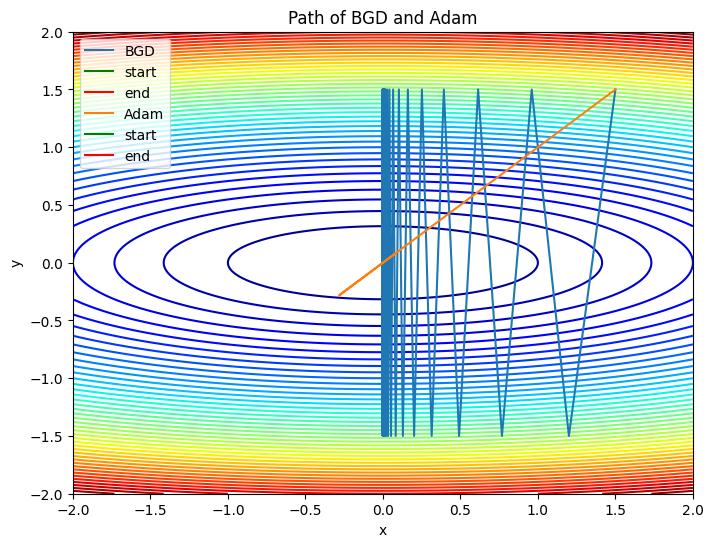

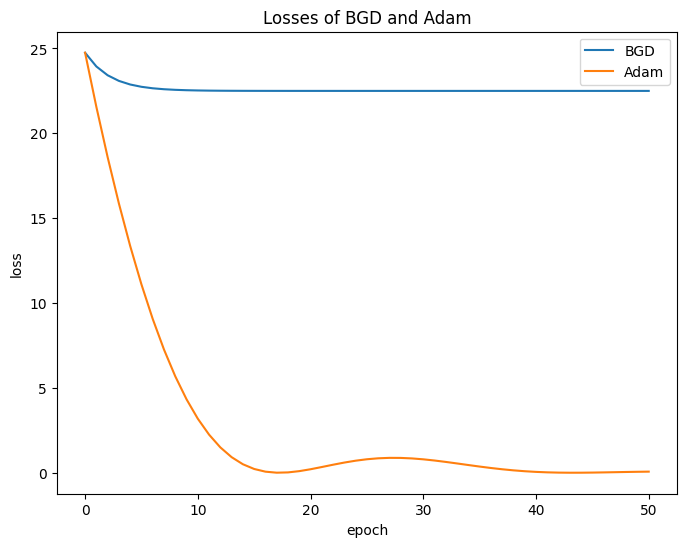

In [82]:
plot_path(quadratic_loss, [path_BGD, path_adam], ['BGD', 'Adam'], 'Path of BGD and Adam')
plot_losses([losses_BGD, losses_adam], ['BGD', 'Adam'], 'Losses of BGD and Adam')